In [178]:
import os

def parse_file(filename, num_turns):
    with open(filename) as f:
        for line in f.readlines()[1:]:
            turns, tasks, avg = line.split(",")

            if int(turns) == num_turns:
                return int(tasks)
    
    # raise Exception(f"only {turns} turns in {filename}")
    return int(tasks)

def parse_points(filename):
    points = []
    with open(filename) as f:
        for line in f.readlines()[1:]:
            turns, tasks, avg = line.split(",")
            points.append((int(turns), int(tasks)))


    return [(tu, ta / int(tasks)) for tu, ta in points]


def get_results(num_abilities, difficulty=None, num_turns=-1):
    groups = {g:[] for g in range(1, 11)}
    for file in os.listdir("results/t3/"):
        m, a, g, t, task_lvl, group_abs, abs_lvl = file[:-4].split("_")[1:]
        num_members = int(m[1:])
        num_abs = int(a[1:])
        group = int(g[1:])
        group_task_difficulty = [int(t[1:]), task_lvl]
        group_ability_difficulty =  [int(group_abs[1:]), abs_lvl]

        if difficulty and (difficulty != group_task_difficulty[1] or difficulty != group_ability_difficulty[1]):
            continue

        if num_abilities != num_abs:
            continue

        turns = parse_file("results/t3/" + file, num_turns)

        groups[group].append(turns)

    return groups

def get_points(target_group):
    points = []
    for file in os.listdir("results/t3/"):
        m, a, g, t, task_lvl, group_abs, abs_lvl = file[:-4].split("_")[1:]
        num_members = int(m[1:])
        num_abs = int(a[1:])
        group = int(g[1:])
        group_task_difficulty = [int(t[1:]), task_lvl]
        group_ability_difficulty =  [int(group_abs[1:]), abs_lvl]

        if target_group != group:
            continue

        file_points = parse_points("results/t3/" + file)
        points.extend(file_points)

    return points


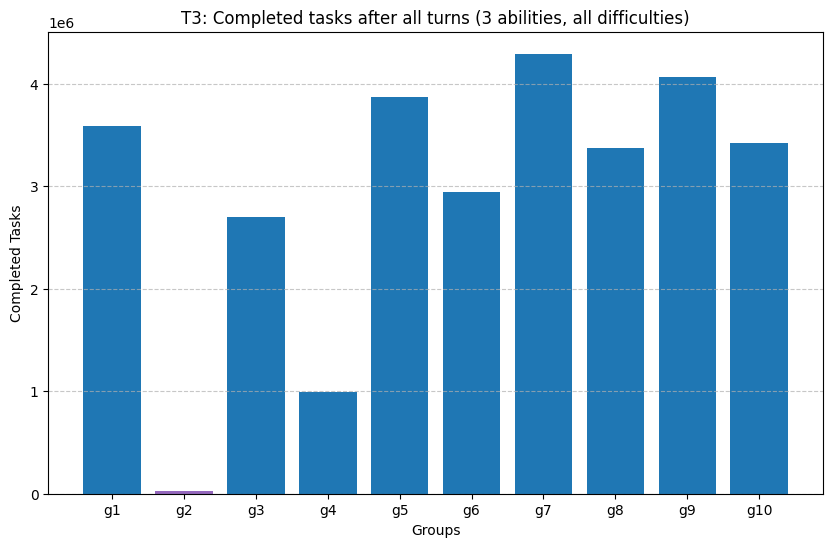

In [ ]:
import matplotlib.pyplot as plt

abs = 3
groups = get_results(num_abilities=abs, difficulty=None)

k = [f"g{g}" for g in groups.keys()]
v = [sum(x) for x in groups.values()]

plt.figure(figsize=(10, 6))
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]
plt.bar(k, v, color=colors)
plt.xlabel('Groups')
plt.ylabel('Completed Tasks')
plt.title(f'T3: Completed tasks after all turns ({abs} abilities, all difficulties)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


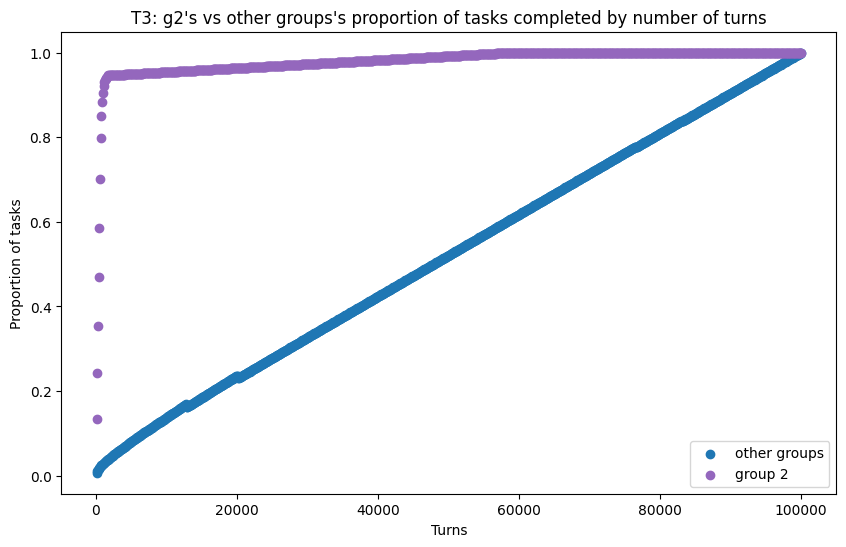

In [229]:
import matplotlib.pyplot as plt
import numpy as np

abs = 3
g2points = get_points(2)

avg = dict()
for turns, tasks in g2points:
    if turns not in avg:
        avg[turns] = []
    avg[turns].append(tasks)

g2points = [(k, sum(v) / len(v)) for k, v in avg.items()]

x2 = np.array([i for i, _ in g2points])
y2 = np.array([j for _, j in g2points])

# slope, intercept = np.polyfit(x, y, 1)
# y_pred = slope * x + intercept

otherpoints = []
for g in range(1, 11):
    if g == 2:
        continue
    points = get_points(g)
    otherpoints.extend(points)


avg = dict()
for turns, tasks in otherpoints:
    if turns not in avg:
        avg[turns] = []
    avg[turns].append(tasks)

otherpoints = [(k, sum(v) / len(v)) for k, v in avg.items()]

xo = np.array([i for i, _ in otherpoints])
yo = np.array([j for _, j in otherpoints])


plt.figure(figsize=(10, 6))
plt.scatter(xo, yo, color="C0", label="other groups")
plt.scatter(x2, y2, color="C4", label="group 2")
plt.legend()


plt.xlabel('Turns')
plt.ylabel('Proportion of tasks')
plt.title(f"T3: g2's vs other groups's proportion of tasks completed by number of turns")

plt.show()

# weird linear slope is group 4's hard distribution


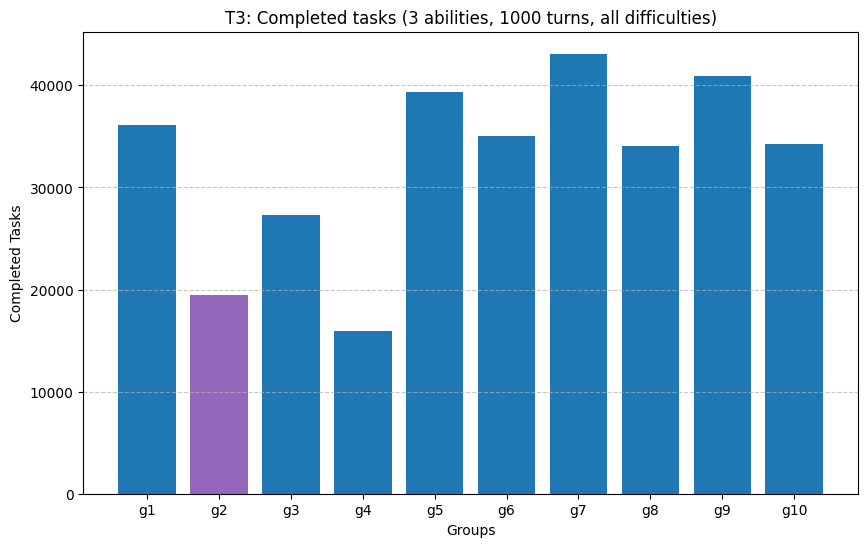

In [ ]:
import matplotlib.pyplot as plt

turns = 1000
abs =3
groups = get_results(num_abilities=abs, num_turns=turns, difficulty=None)

k = [f"g{g}" for g in groups.keys()]
v = [sum(x) for x in groups.values()]

plt.figure(figsize=(10, 6))
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]
plt.bar(k, v, color=colors)
plt.xlabel('Groups')
plt.ylabel('Completed Tasks')
plt.title(f'T3: Completed tasks ({abs} abilities, {turns} turns, all difficulties)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


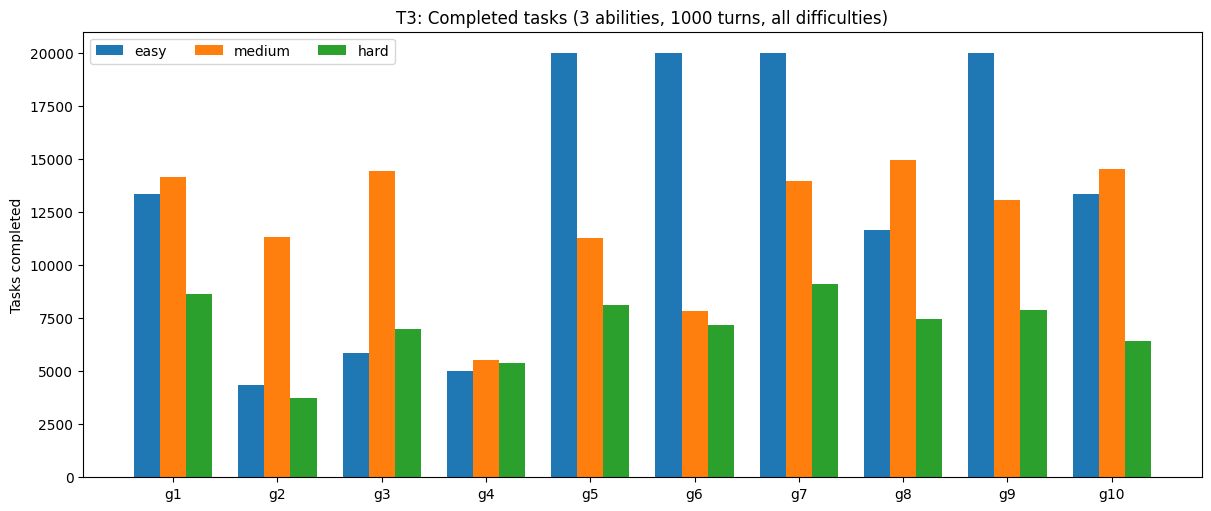

In [157]:
import matplotlib.pyplot as plt
import numpy as np

turns = 1000
abs =3
easy_groups = get_results(num_abilities=abs, num_turns=turns, difficulty="easy")
mid_groups = get_results(num_abilities=abs, num_turns=turns, difficulty="medium")
hard_groups = get_results(num_abilities=abs, num_turns=turns, difficulty="hard")

k = [f"g{g}" for g in easy_groups.keys()]


data = {"easy": [sum(scores) for scores in easy_groups.values()], 
        "medium": [sum(scores) for scores in mid_groups.values()], 
        "hard": [sum(scores) for scores in hard_groups.values()]}

# plt.figure(figsize=(10, 6))
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]
multiplier = 0
width = 0.25
x = np.arange(10)

fig, ax = plt.subplots(figsize=(12, 5), layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Tasks completed')
ax.set_xticks(x + width, k)
ax.legend(loc='upper left', ncols=3)
plt.title(f'T3: Completed tasks ({abs} abilities, {turns} turns, all difficulties)')
plt.show()


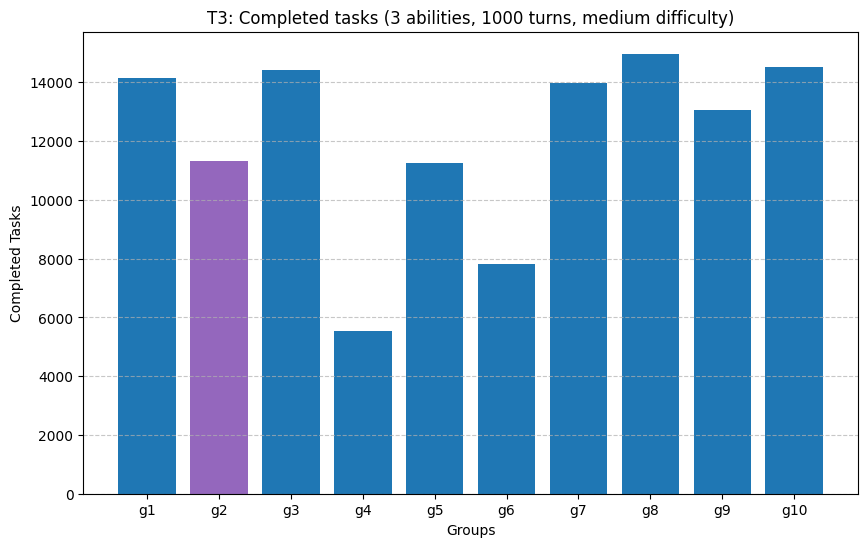

In [234]:
import matplotlib.pyplot as plt

turns = 1000
abs =3
groups = get_results(num_abilities=abs, num_turns=turns, difficulty="medium")

k = [f"g{g}" for g in groups.keys()]
v = [sum(x) for x in groups.values()]

plt.figure(figsize=(10, 6))
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]
plt.bar(k, v, color=colors)
plt.xlabel('Groups')
plt.ylabel('Completed Tasks')
plt.title(f'T3: Completed tasks ({abs} abilities, {turns} turns, medium difficulty)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
